<a href="https://colab.research.google.com/github/vieweghn/EENG-310-Signals-and-Systems/blob/main/EENG_310_HW09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [85]:
pi = np.pi

A. The fourier series of the periodic waveform (a) $f_1(t)$ below is given by:

$$ f_1(t) = 10 - \frac{20}{\pi} \sum_{n=1}^{\infty} \frac{1}{n} \sin\left(\frac{n\pi t}{2}\right). $$

Determine the Fourier series of the waveform (b) below.

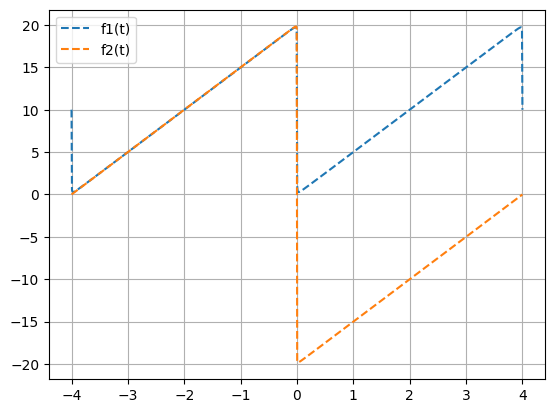

In [86]:
t = np.linspace(-4, 4, 1000)
f1 = lambda t: 10 - 20 / np.pi * sum(1 / n * np.sin(n * np.pi * t / 2) for n in range(1, 1000))
f2 = lambda t: -40 / np.pi * sum(1 / n * np.sin(n * np.pi * t / 4) for n in range(1, 10000))
plt.plot(t, f1(t), label='f1(t)', linestyle='--')
plt.plot(t, f2(t), label='f2(t)', linestyle='--')
plt.legend()
plt.grid()
plt.show()

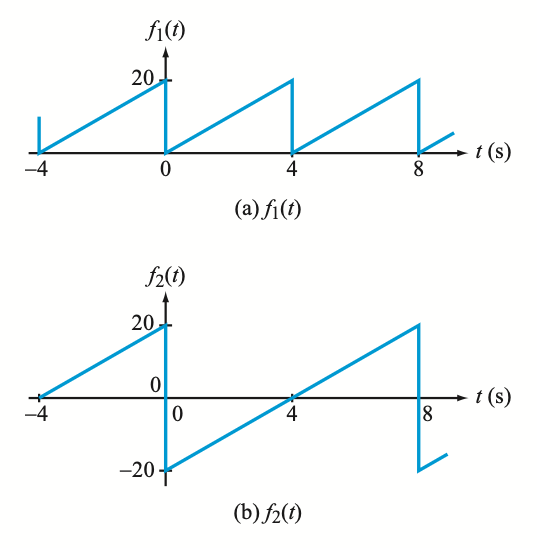

B. The current source $i_s(t)$ in the circuit below generates a sawtooth wave (see more below) with a peak amplitude of $20\mathrm{~mA}$ and a period of $T=\mathrm{~5ms}$.

1. Derive the Fourier series representation of $v_{\mathrm out}(t)$
2. Calculate the first five terms of $v_{\mathrm out}(t)$ using $R_1=500~\mathrm{\Omega}$, $R_2=2~\mathrm{k\Omega}$, and $C=0.33\mathrm{~\mu F}$.
3. Plot $v_\mathrm{out}(t)$, and $i_s(t)$ using $n_\mathrm{max}=100$.

1.) $i_{s}(t) = 10 - \frac{20}{\pi} \sum_{n=1}^{∞} \frac{1}{n}sin(\frac{n \pi t}{2})$

$v_{out}(t) = \frac{R_1}{\sqrt{(C \omega(R_2 + R_1))^2 + 1}}(10 - \frac{20}{\pi} \sum_{n=1}^{∞} \frac{1}{n}sin(\frac{n \pi t}{2} - e^{-j \tan^{-1}(C \omega (R_2 + R_1)}))$

In [87]:
t,R1,R2,C,T0 = sp.symbols("t,R1,R2,C,T0", real=True, positive=True)
n = sp.symbols("n",integer=True)
s=sp.symbols("s")

subsVals = {T0:sp.Rational(5,1000), R1:500, R2:2000, C:sp.Rational(33,int(1e6))}

omega0 = 2*sp.pi/T0
H = R1 / (C*(R2 + R1)*s + 1)
H


R1/(C*s*(R1 + R2) + 1)

In [95]:
i_s = 10 - (20 / sp.pi) * sp.Sum((1 / n) * sp.sin(n * omega0 * t), (n, 1, 5))
i_s

-20*Sum(sin(2*pi*n*t/T0)/n, (n, 1, 5))/pi + 10

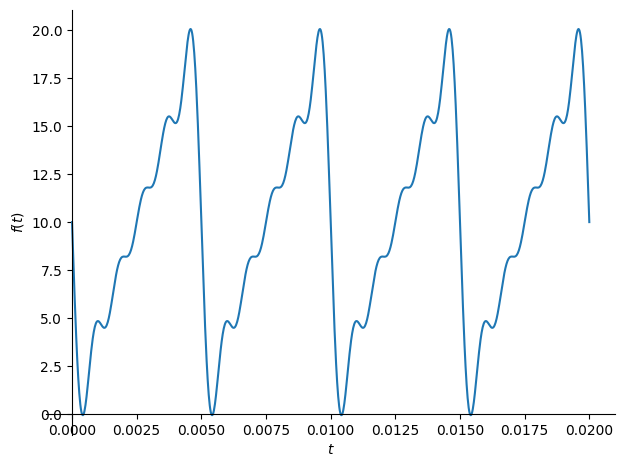

In [89]:
sp.plot(i_s.subs(subsVals),(t,0,.02))

In [90]:
def Hmag(omega):
  return sp.Abs(H.subs({s:sp.I*omega}).subs(subsVals))

def Hphase(omega):
  return sp.arg(H.subs(s,sp.I*omega))

In [91]:
Vout = (10 - (20 / sp.pi) * sp.Sum(Hmag(n * omega0) * (1 / n) * sp.sin(n * omega0 * t + Hphase(n * omega0)), (n, 1, 5)))
Vout.subs(subsVals)
print(Vout)


-20*Sum(500*sin(arg(1/(2*I*pi*C*n*(R1 + R2)/T0 + 1)) + 2*pi*n*t/T0)/(n*sqrt(1089*pi**2*n**2 + 1)), (n, 1, 5))/pi + 10


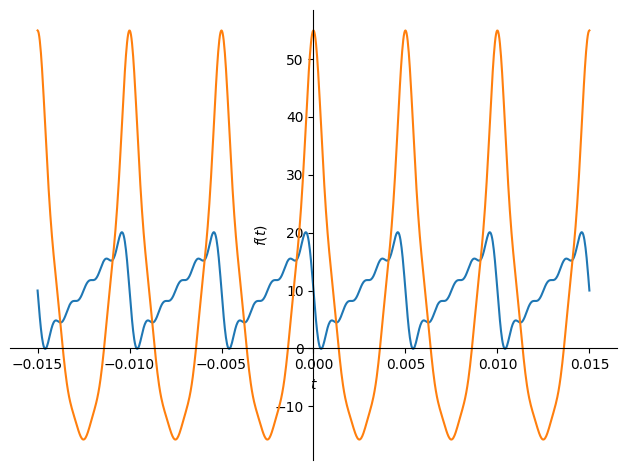

In [92]:
sp.plot(i_s.subs(subsVals),Vout.subs(subsVals),(t,-.015,.015))

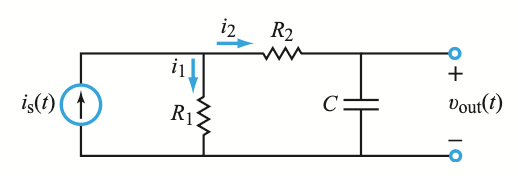

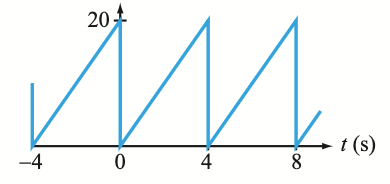

Here's what I got for the first 5 Fourier terms:

```
Term: n=0:   5.000 (DC)
Term: n=1:  -2.210 sin( 1260t + -46.0 deg)
Term: n=2:  -0.691 sin( 2510t + -64.3 deg)
Term: n=3:  -0.325 sin( 3770t + -72.2 deg)
Term: n=4:  -0.187 sin( 5030t + -76.4 deg)
```

The output should look like this when you're done.


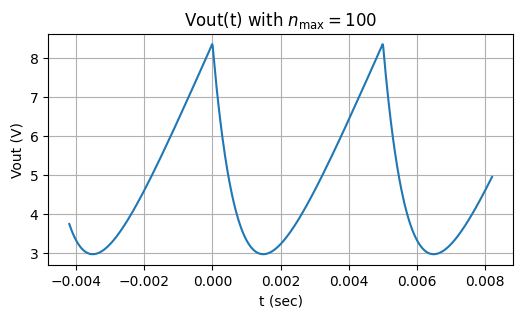

C. Voltage source $v_s(t)$ in the circuit below has the waveform displayed below.

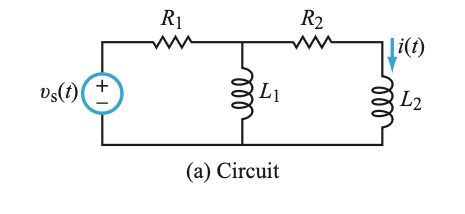

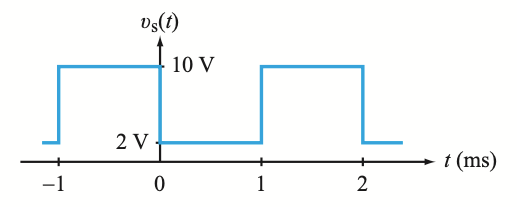

1. Derive the Fourier series representation of $i(t)$.
2. Calculate the first five terms of $i(t)$ using:

$$ R_1 = R_2 = 10\mathrm{~\Omega} \text{ and } L_1=L_2=10\mathrm{~mH}$$
3. Plot $i(t)$ and $v_s(t)$ using $n_\mathrm{max}=100$.

Here's what I got for the first five Fourier terms:

```
Term: n=1:  -0.124 sin( 3140t + -43.3 deg)
Term: n=3:  -0.017 sin( 9420t + -72.2 deg)
Term: n=5:  -0.006 sin(15700t + -79.1 deg)

n=0,2,4,6... are all zero

```

The correct output looks like this:

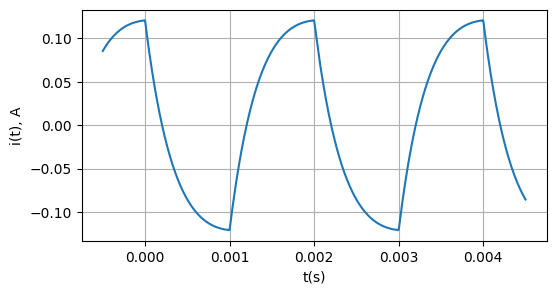